In [25]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import datetime
import pickle

In [26]:
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [27]:
input_filename = 'temp/db'
articoli = pd.read_csv(input_filename, sep=";")
del(articoli["Unnamed: 0"])

In [28]:
with open('stop_words', 'rb') as stopwords_dump:
    stop_words = pickle.load(stopwords_dump)

In [29]:
articoli = articoli[articoli['Vertical'] == "Energy & Utility"]

In [30]:
cols = ["Anno", "Mese", "Data", "Trend"]
df = articoli.groupby(cols).size().reset_index(name="Count").sort_values("Count", ascending=False)
#df = df[df['Anno'] == 2020]
df.head()

,Anno,Mese,Data,Trend,Count
41,2020,4,2020-04-17,Smart & Digital Water,4
87,2020,6,2020-06-11,Advancements in Physics,2
79,2020,5,2020-05-27,Transition to Renewable and New Sources of Energy,2
43,2020,4,2020-04-21,Transition to Renewable and New Sources of Energy,2
57,2020,5,2020-05-11,Transition to Renewable and New Sources of Energy,2


Text(0.5, 0, 'Mese')

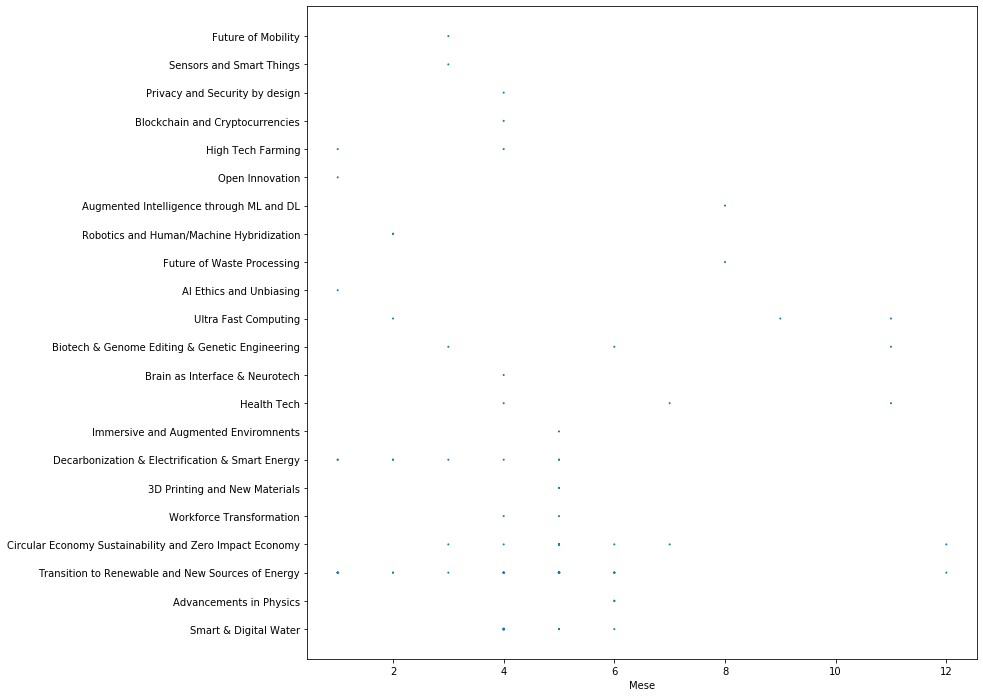

In [31]:
plt.figure(figsize=(12, 12))
plt.scatter('Mese', 'Trend', s="Count", data=df)
plt.xlabel('Mese')

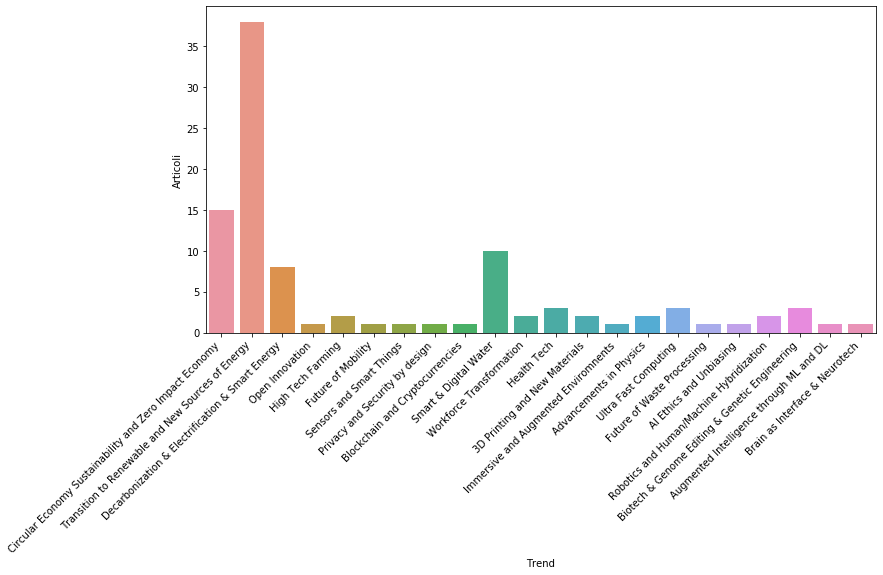

In [32]:
plt.figure(figsize=(12,6))
ax=sns.countplot(articoli["Trend"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel("Articoli")
plt.xlabel("Trend")
plt.show()

In [33]:
df = articoli[['ID', 'Tech']].replace(np.nan, '', regex=True)
df = df[~(df['Tech'].str.len() == 0)]

df = pd.concat([pd.Series(row['ID'], row['Tech'].split(', '))              
                    for _, row in df.iterrows()]).reset_index().rename(columns={"index": "Tech"})

#df = df.groupby(["Tech"]).size().reset_index(name="Count").sort_values("Tech", ascending=False)
df.head()

,Tech,0
0,Sensors,ac85755ef741e4fb60060c5284d346a3
1,Batteries,2f2f2cefb8207f632e30f11e71b33047
2,Machine Learning,1223b5ea2003863f424fe82fe9c386ac
3,Machine Learning,8d3b58c327e1d7f316b1f2d3bbf19468
4,Machine Learning,8e555e4c8908608a69020f1cf6d1791f


In [39]:
raw_data = articoli[['Data', 'Titolo']].rename(columns={"Data": "publish_date", "Titolo": "headline_text"})
#raw_data.head()

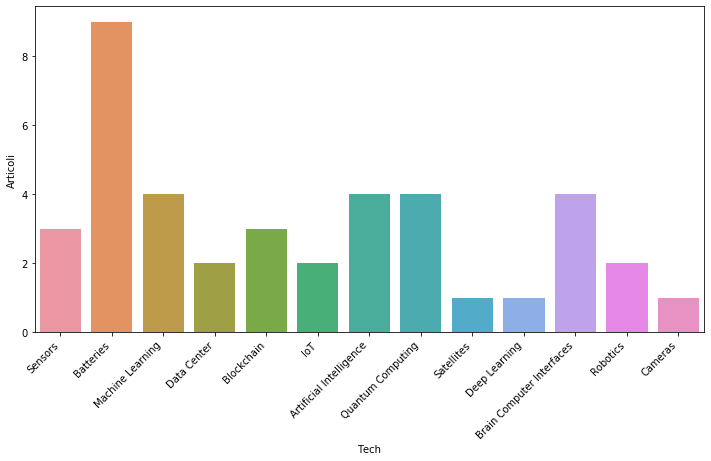

In [40]:
plt.figure(figsize=(12,6))
ax=sns.countplot(df["Tech"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel("Articoli")
plt.xlabel("Tech")
plt.show()

In [41]:
reindexed_data = raw_data['headline_text']
reindexed_data.index = pd.to_datetime(raw_data['publish_date'])
#raw_data.head()

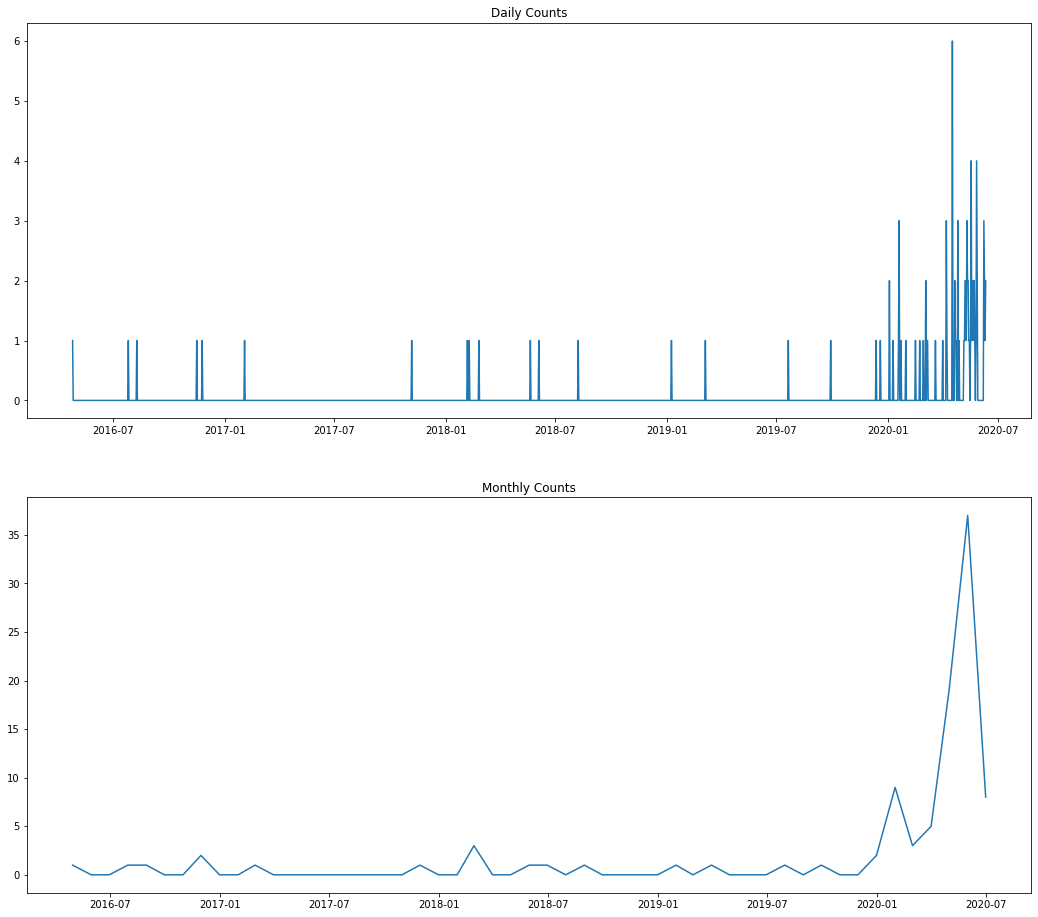

In [42]:
monthly_counts = reindexed_data.resample('M').count()
#yearly_counts = reindexed_data.resample('A').count()
daily_counts = reindexed_data.resample('D').count()

fig, ax = plt.subplots(2, figsize=(18,16))
ax[0].plot(daily_counts);
ax[0].set_title('Daily Counts');
ax[1].plot(monthly_counts);
ax[1].set_title('Monthly Counts');
#ax[2].plot(yearly_counts);
#ax[2].set_title('Yearly Counts');
plt.show()

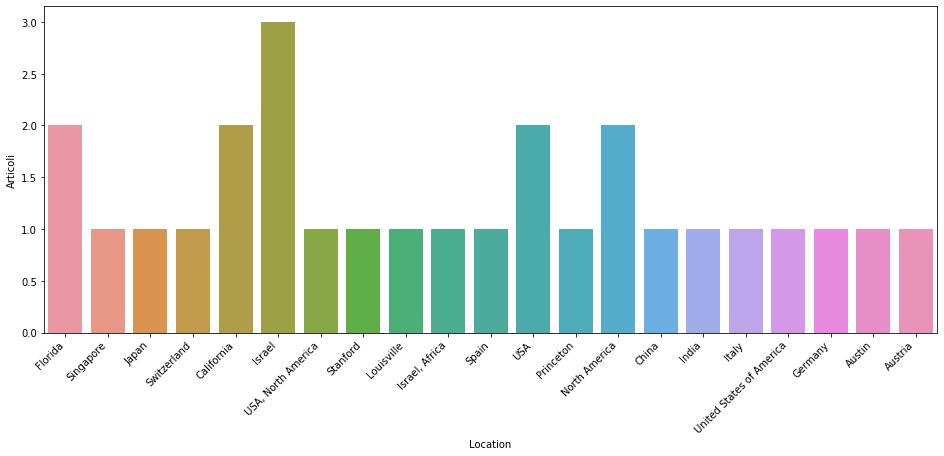

In [43]:
articoli['Location'].replace("", float('NaN'), inplace=True)
data = articoli.dropna(subset = ["Location"])

plt.figure(figsize=(16,6))
ax=sns.countplot(data['Location'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel("Articoli")
plt.xlabel("Location")
plt.show()

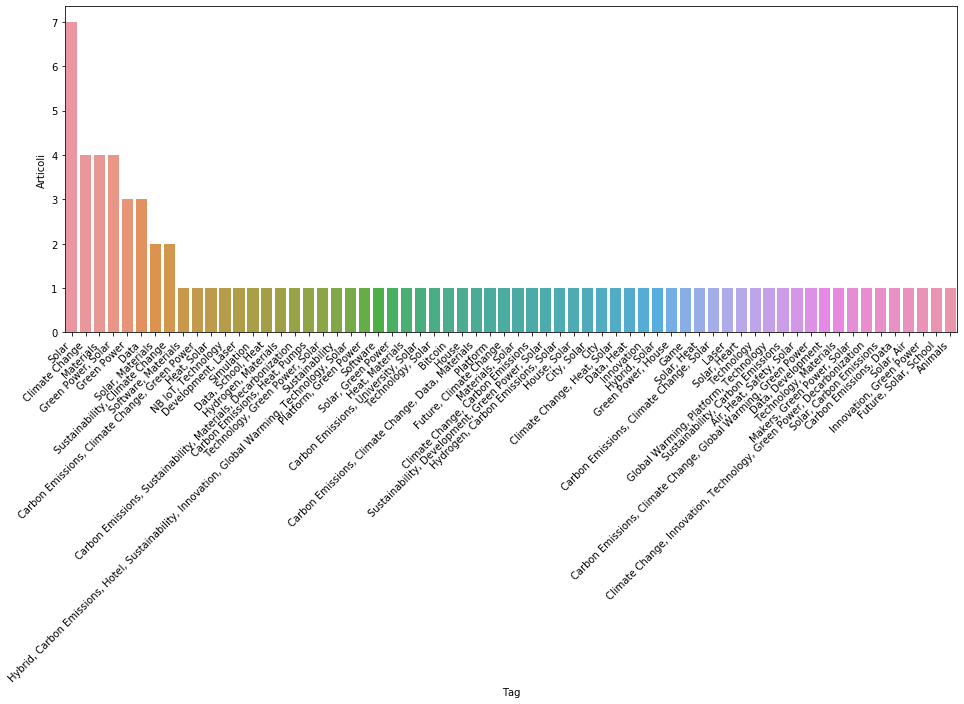

In [44]:
articoli['Tag'].replace("", float('NaN'), inplace=True)
data = articoli.dropna(subset = ["Tag"])

plt.figure(figsize=(16,6))
#ax=sns.countplot(data['Tag'])

ax = sns.countplot(x = 'Tag',
              data = data,
              order = data['Tag'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel("Articoli")
plt.xlabel("Tag")
plt.show()

In [15]:
data['Tag'].replace("", float('NaN'), inplace=True)
data = articoli.dropna(subset = ["Tag"])

C:\Users\edoardo.esposito\AppData\Local\Continuum\anaconda3\envs\techadv\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [45]:
df = pd.concat([pd.Series(row['ID'], row['Tag'].split(', '))              
                    for _, row in data.iterrows()]).reset_index().rename(columns={"index": "Tag"})

In [46]:
df.head()

,Tag,0
0,Solar,fdac3400d3010313560278f654ea52a7
1,Future,1fc27ed22e4acf37a3da988be33969a2
2,Solar,1fc27ed22e4acf37a3da988be33969a2
3,School,1fc27ed22e4acf37a3da988be33969a2
4,Solar,ae3fc0d13249dc268730f426ae241e05


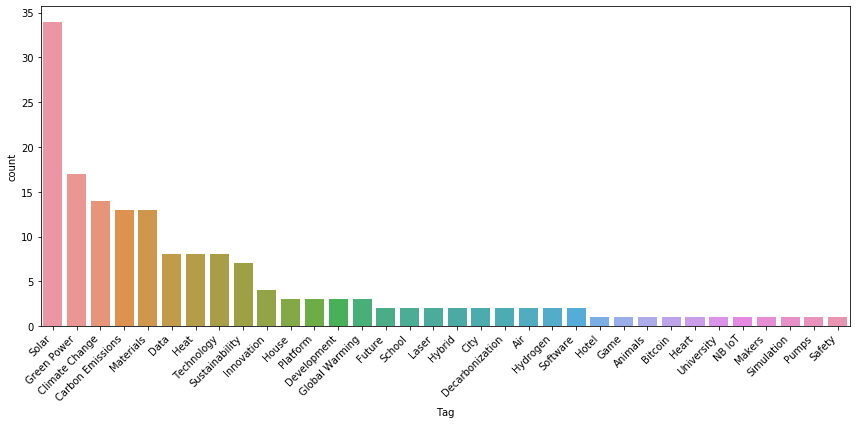

In [48]:
plt.figure(figsize=(12,6))

ax = sns.countplot(x = 'Tag',
              data = df,
              order = df['Tag'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [49]:
cols = ["Anno", "Trend"]
df = articoli.groupby(cols).size().reset_index(name="Count").sort_values("Count", ascending=False)
#df = df[df['Anno'] == 2020]
df.head()

,Anno,Trend,Count
31,2020,Transition to Renewable and New Sources of Energy,37
21,2020,Circular Economy Sustainability and Zero Impact Economy,12
30,2020,Smart & Digital Water,10
22,2020,Decarbonization & Electrification & Smart Energy,7
32,2020,Workforce Transformation,2


In [50]:
pv = df.pivot("Trend", "Anno", "Count")

In [51]:
pv.head()

Anno,2016,2017,2018,2019,2020
Trend,,,,,
3D Printing and New Materials,NaN,NaN,NaN,NaN,2.0
AI Ethics and Unbiasing,NaN,NaN,NaN,1.0,NaN
Advancements in Physics,NaN,NaN,NaN,NaN,2.0
Augmented Intelligence through ML and DL,1.0,NaN,NaN,NaN,NaN
Biotech & Genome Editing & Genetic Engineering,1.0,NaN,1.0,1.0,NaN


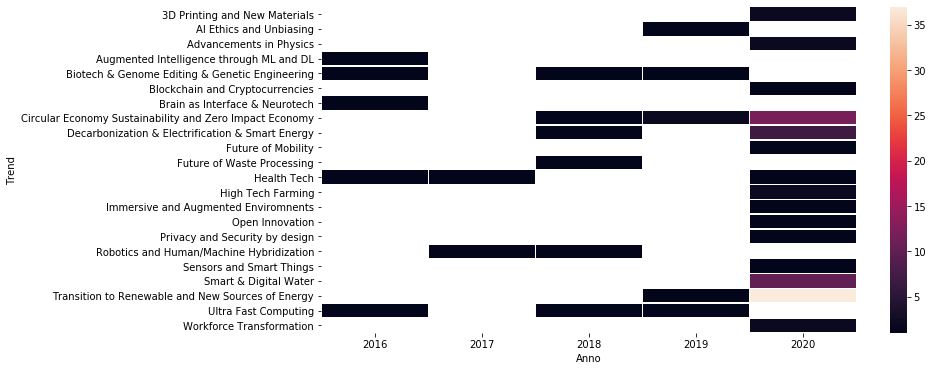

In [53]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(pv, annot=False, linewidths=.5)
plt.show()